# Libraries

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np
from pandas.io.json import json_normalize  # tranform JSON file into a pandas dataframe
# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
from geopy.geocoders import Nominatim

### Explore neighboorhood using BeautifulSoup ###

In [7]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
result = requests.get(url)
data_html = BeautifulSoup(result.content)

### Read the data into a Pandas Dataframe ###

In [8]:
soup = BeautifulSoup(str(data_html))
neigh = soup.find('table')
table_str = str(neigh.extract())

In [9]:
df = pd.read_html(table_str)[0]
df.head(12)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


### Remove Not assigned Boroughs ### 

In [12]:
df_dropna = df[df.Borough != 'Not assigned'].reset_index(drop=True)

### Rename Postal Code to PostalCode ### 

In [13]:
df_dropna.rename(columns={'Postal Code' : 'PostalCode'}, inplace=True)
df = df_dropna
df.head(12)

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


### Group Borough Data ###

In [14]:
df_grouped = df.groupby(['Borough', 'PostalCode'], as_index=False).agg(lambda x:','.join(x))
df_grouped.head(12)

,Borough,PostalCode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"
5,Central Toronto,M4V,"Summerhill West, Rathnelly, South Hill, Forest..."
6,Central Toronto,M5N,Roselawn
7,Central Toronto,M5P,"Forest Hill North & West, Forest Hill Road Park"
8,Central Toronto,M5R,"The Annex, North Midtown, Yorkville"
9,Downtown Toronto,M4W,Rosedale


### Examine Neighborhoods Not Assigned ###

In [13]:
df_grouped.loc[df_grouped['Borough'].isin(["Not assigned"])]

,Borough,PostalCode,Neighbourhood


### Shape ###

In [14]:
df = df_grouped

In [15]:
df.shape

(103, 3)

### Rearranged so the PostalCode appears first ###

In [18]:
df = df.groupby(["PostalCode", "Borough"])["Neighbourhood"].apply(", ".join).reset_index()
df.head(12)

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [20]:
cor_url = "https://cocl.us/Geospatial_data"
cor_url

'https://cocl.us/Geospatial_data'

### Latitudes and Longitudes aligned to the different PostalCodes ###

In [22]:
cor_url = "https://cocl.us/Geospatial_data"

df_geo = pd.read_csv(cor_url)
df_geo.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_geo.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Data Merging ###

In [73]:
df_geo = pd.read_csv("https://cocl.us/Geospatial_data")
df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# Latitude and Longitude of Toronto #

In [76]:
address = "Toronto, ON"

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto city are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto city are 43.6534817, -79.3839347.


### Toronto map ###

In [77]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

### Toronto map with marks ###

In [79]:
for lat, lng, borough, neighbourhood in zip(
        df_toronto['Latitude'], 
        df_toronto['Longitude'], 
        df_toronto['Borough'], 
        df_toronto['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

#  Foursquare Credentials #

In [83]:
CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET =  # your Foursquare Secret
VERSION = '20200514' # Foursquare API version

print('Credentials Stored')

Credentials Stored


In [88]:
neighborhood_name = df_toronto.loc[0, 'Neighbourhood']
print(f"The first neighbourhood's name is '{neighborhood_name}'.")

The first neighbourhood's name is 'The Beaches'.


In [89]:
neighborhood_latitude = df_toronto.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_toronto.loc[0, 'Longitude'] # neighborhood longitude value

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [90]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# get the result to a json file
results = requests.get(url).json()

In [91]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [92]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Glen Manor Ravine,Trail,43.676821,-79.293942
1,The Big Carrot Natural Food Market,Health Food Store,43.678879,-79.297734
2,Grover Pub and Grub,Pub,43.679181,-79.297215
3,Upper Beaches,Neighborhood,43.680563,-79.292869


In [95]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [96]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )

In [97]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [99]:
toronto_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,55,55,55,55,55,55
"Brockton, Parkdale Village, Exhibition Place",23,23,23,23,23,23
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",16,16,16,16,16,16
Central Bay Street,68,68,68,68,68,68
Christie,16,16,16,16,16,16
Church and Wellesley,75,75,75,75,75,75
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,33,33,33,33,33,33


In [100]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


In [134]:
print("The Venue Categories are", toronto_venues['Venue Category'].unique())

The Venue Categories are ['Trail' 'Health Food Store' 'Pub' 'Neighborhood' 'Greek Restaurant'
 'Cosmetics Shop' 'Italian Restaurant' 'Ice Cream Shop' 'Brewery'
 'Yoga Studio' 'Juice Bar' 'Fruit & Vegetable Store' 'Restaurant'
 'Pizza Place' 'Bookstore' 'Furniture / Home Store' 'Dessert Shop'
 'Bubble Tea Shop' 'Spa' 'Grocery Store' 'Coffee Shop' 'Bakery'
 'Indian Restaurant' 'Caribbean Restaurant' 'Café' 'Lounge'
 'Frozen Yogurt Shop' 'Sushi Restaurant' 'American Restaurant'
 'Liquor Store' 'Gym' 'Fish & Chips Shop' 'Fast Food Restaurant' 'Park'
 'Pet Store' 'Steakhouse' 'Burrito Place' 'Movie Theater' 'Sandwich Place'
 'Fish Market' 'Gay Bar' 'Seafood Restaurant' 'Thai Restaurant'
 'Middle Eastern Restaurant' 'Cheese Shop' 'Comfort Food Restaurant'
 'Stationery Store' 'Coworking Space' 'Latin American Restaurant'
 'Gastropub' 'Gym / Fitness Center' 'Bar' 'Convenience Store' 'Bank'
 'Diner' 'Clothing Store' 'Wine Bar' 'Swim School' 'Bus Line'
 'Breakfast Spot' 'Food & Drink Shop' 'Depa

In [146]:
"Vegetarian / Vegan Restaurant" in toronto_venues['Venue Category'].unique()

True

In [147]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1624, 236)


,Neighbourhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(39, 236)


,Neighbourhoods,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.018182,0.0,0.0,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.0625,0.0625,0.0625,0.125,0.125,0.0625,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,Central Bay Street,0.0,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.014706,0.0,0.0,0.014706,0.014706


In [148]:
fd = to_grouped[["Neighbourhoods","Vegetarian / Vegan Restaurant"]]
fd.head()

,Neighbourhoods,Vegetarian / Vegan Restaurant
0,Berczy Park,0.018182
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.014706


In [152]:
fd = fd.rename(columns={'Neighbourhoods':'Neighbourhood'})

In [153]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = fd.drop(['Neighbourhood'], axis=1)

In [154]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [155]:
def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

Text(0, 0.5, 'Error')

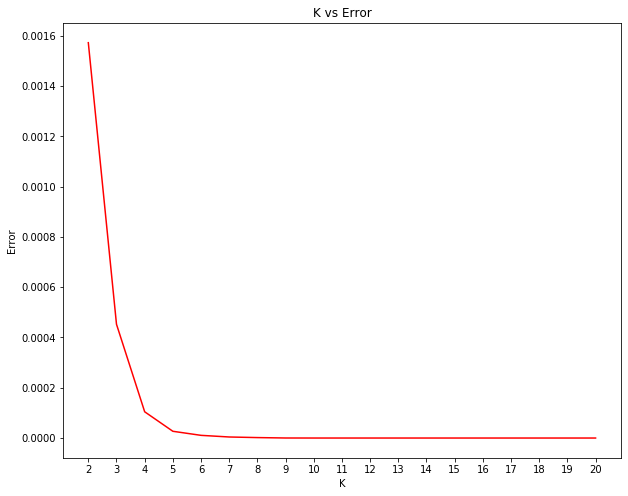

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

In [167]:
kclusters = 4

toronto_grouped_clustering = fd.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 3, 1, 1, 0, 1, 1])

In [169]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
to_merged = fd.copy()

# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_
to_merged.head()

,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels
0,Berczy Park,0.018182,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.014706,3


In [171]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
to_merged = to_merged.join(toronto_venues.set_index("Neighbourhood"), on="Neighbourhood")

print(to_merged.shape)
to_merged.head()

(1624, 9)


,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.018182,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.018182,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.018182,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.018182,0,43.644771,-79.373306,Goose Island Brewhouse,43.647329,-79.373541,Beer Bar
0,Berczy Park,0.018182,0,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall


In [172]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(1624, 9)


,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.018182,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
7,"Commerce Court, Victoria Hotel",0.020000,0,43.648198,-79.379817,Biff's Bistro,43.647085,-79.376342,French Restaurant
7,"Commerce Court, Victoria Hotel",0.020000,0,43.648198,-79.379817,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
7,"Commerce Court, Victoria Hotel",0.020000,0,43.648198,-79.379817,Victoria's Restaurant,43.649298,-79.376431,Restaurant
7,"Commerce Court, Victoria Hotel",0.020000,0,43.648198,-79.379817,Starbucks,43.650159,-79.377793,Coffee Shop
...,...,...,...,...,...,...,...,...,...
29,St. James Town,0.011765,3,43.651494,-79.375418,St. Lawrence Market Plaza,43.649169,-79.372330,Art Gallery
29,St. James Town,0.011765,3,43.651494,-79.375418,Downtown Camera,43.653107,-79.375120,Camera Store
29,St. James Town,0.011765,3,43.651494,-79.375418,The George Street Diner,43.652970,-79.371467,Diner
29,St. James Town,0.011765,3,43.651494,-79.375418,Leña,43.651722,-79.379205,Latin American Restaurant


In [173]:
to_merged['Venue Category'].value_counts()["Vegetarian / Vegan Restaurant"]

16

In [175]:
fd["Cluster Labels"] = kmeans.labels_
fd.head()

,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels
0,Berczy Park,0.018182,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.014706,3


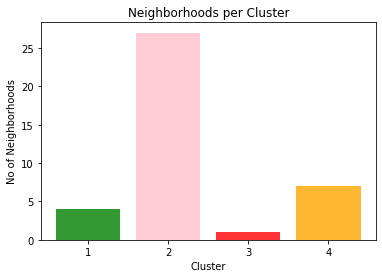

In [209]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = fd['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['green', 'pink','red', 'orange'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('Neighborhoods per Cluster')

plt.show()

In [184]:
# Neighborhoods in each cluster
fd['Cluster Labels'].value_counts()

1    27
3     7
0     4
2     1
Name: Cluster Labels, dtype: int64

In [186]:
# This will create a dataframe with borough of each neighborhood which we will merge with each cluster dataframe
df_new = df[['Borough', 'Neighbourhood']]
df_new.head()

,Borough,Neighbourhood
0,Scarborough,"Malvern, Rouge"
1,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,Scarborough,"Guildwood, Morningside, West Hill"
3,Scarborough,Woburn
4,Scarborough,Cedarbrae


In [189]:
clus1 = to_merged.loc[to_merged['Cluster Labels'] == 0]
df_clus1 = pd.merge(df_new, cluster1, on='Neighbourhood')
df_clus1

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,Berczy Park,0.018182,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
1,Downtown Toronto,Berczy Park,0.018182,0,43.644771,-79.373306,Goose Island Brewhouse,43.647329,-79.373541,Beer Bar
2,Downtown Toronto,Berczy Park,0.018182,0,43.644771,-79.373306,St. Lawrence Market Plaza,43.649169,-79.372330,Art Gallery
3,Downtown Toronto,Berczy Park,0.018182,0,43.644771,-79.373306,Pravda Vodka Bar,43.648516,-79.374732,Cocktail Bar
4,Downtown Toronto,Berczy Park,0.018182,0,43.644771,-79.373306,Crepe It Up!,43.648736,-79.371623,Creperie
...,...,...,...,...,...,...,...,...,...,...
228,West Toronto,"Runnymede, Swansea",0.030303,0,43.651571,-79.484450,Booster Juice,43.649802,-79.483683,Smoothie Shop
229,West Toronto,"Runnymede, Swansea",0.030303,0,43.651571,-79.484450,Bloom Restaurant,43.650307,-79.479836,Latin American Restaurant
230,West Toronto,"Runnymede, Swansea",0.030303,0,43.651571,-79.484450,Max's Market,43.650525,-79.479145,Gourmet Shop
231,West Toronto,"Runnymede, Swansea",0.030303,0,43.651571,-79.484450,RBC Royal Bank,43.650142,-79.480274,Bank


In [193]:
clus2=to_merged.loc[to_merged['Cluster Labels'] == 1]
df_clus2 = pd.merge(df_new, clus2, on='Neighbourhood')
df_clus2

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,The Beaches,0.0,1,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
1,East Toronto,The Beaches,0.0,1,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,East Toronto,The Beaches,0.0,1,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
3,East Toronto,The Beaches,0.0,1,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
4,East Toronto,"The Danforth West, Riverdale",0.0,1,43.679557,-79.352188,Starbucks,43.678879,-79.346357,Coffee Shop
...,...,...,...,...,...,...,...,...,...,...
663,East Toronto,"Business reply mail Processing Centre, South C...",0.0,1,43.662744,-79.321558,Queen Margherita Pizza,43.664685,-79.324164,Pizza Place
664,East Toronto,"Business reply mail Processing Centre, South C...",0.0,1,43.662744,-79.321558,Chino Locos,43.664653,-79.325584,Burrito Place
665,East Toronto,"Business reply mail Processing Centre, South C...",0.0,1,43.662744,-79.321558,The Sidekick,43.664484,-79.325162,Comic Shop
666,East Toronto,"Business reply mail Processing Centre, South C...",0.0,1,43.662744,-79.321558,Rorschach Brewing Co.,43.663483,-79.319824,Brewery


In [194]:
df_clus2.sort_values(["Vegetarian / Vegan Restaurant"], ascending=False)

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,East Toronto,The Beaches,0.0,1,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
439,Downtown Toronto,"Garden District, Ryerson",0.0,1,43.657162,-79.378937,Uncle Tetsu's Cheesecake (Uncle Tetsu's Japane...,43.656063,-79.383695,Dessert Shop
441,Downtown Toronto,"Garden District, Ryerson",0.0,1,43.657162,-79.378937,Ethiopiques,43.656513,-79.377078,Ethiopian Restaurant
442,Downtown Toronto,"Garden District, Ryerson",0.0,1,43.657162,-79.378937,Victoria's Secret PINK,43.653357,-79.380673,Lingerie Store
443,Downtown Toronto,"Garden District, Ryerson",0.0,1,43.657162,-79.378937,Panago,43.658258,-79.384313,Pizza Place
...,...,...,...,...,...,...,...,...,...,...
223,Downtown Toronto,"St. James Town, Cabbagetown",0.0,1,43.667967,-79.367675,Ambal Trading,43.667538,-79.369350,Market
224,Downtown Toronto,"St. James Town, Cabbagetown",0.0,1,43.667967,-79.367675,Tender Trap Restaurant,43.667724,-79.369485,Chinese Restaurant
225,Downtown Toronto,"St. James Town, Cabbagetown",0.0,1,43.667967,-79.367675,El Charro,43.667606,-79.369490,Restaurant
226,Downtown Toronto,"St. James Town, Cabbagetown",0.0,1,43.667967,-79.367675,Staij & Co Café and Pastry Boutique,43.666863,-79.369228,Café


In [201]:
clus3 = to_merged.loc[to_merged['Cluster Labels'] == 2]
df_clus3 = pd.merge(df_new, clus3, on='Neighbourhood')
df_clus3

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Hibiscus,43.655454,-79.402439,Vegetarian / Vegan Restaurant
1,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Fudao Noodle House,43.654645,-79.398874,Noodle House
2,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Meeplemart,43.651628,-79.397410,Gaming Cafe
3,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,FILM CAFE,43.655109,-79.402342,Comfort Food Restaurant
4,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Sonic Boom,43.650859,-79.396985,Record Shop
...,...,...,...,...,...,...,...,...,...,...
69,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,金城超級市場 Lucky Moose Food Mart,43.653651,-79.394413,Grocery Store
70,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Toronto Western Hospital,43.653434,-79.406074,Hospital
71,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Gushi,43.652258,-79.404884,Japanese Restaurant
72,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",0.054054,2,43.653206,-79.400049,Nom Nom Nom Poutine & Crêpes,43.652111,-79.404786,Poutine Place


In [205]:
clus4 = to_merged.loc[to_merged['Cluster Labels'] == 3]
df_clus4 = pd.merge(df_new, clus4, on='Neighbourhood')
df_clus4

,Borough,Neighbourhood,Vegetarian / Vegan Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Toronto,St. James Town,0.011765,3,43.651494,-79.375418,lululemon athletica,43.653286,-79.380764,Clothing Store
1,Downtown Toronto,St. James Town,0.011765,3,43.651494,-79.375418,Bannock,43.652101,-79.381178,Restaurant
2,Downtown Toronto,St. James Town,0.011765,3,43.651494,-79.375418,Power Up Game Bar,43.648272,-79.375063,Cocktail Bar
3,Downtown Toronto,St. James Town,0.011765,3,43.651494,-79.375418,Aroma Espresso Bar,43.648224,-79.376352,Coffee Shop
4,Downtown Toronto,St. James Town,0.011765,3,43.651494,-79.375418,Jump,43.648147,-79.378752,American Restaurant
...,...,...,...,...,...,...,...,...,...,...
644,Downtown Toronto,"First Canadian Place, Underground city",0.010000,3,43.648429,-79.382280,Noodle King,43.651706,-79.383046,Asian Restaurant
645,Downtown Toronto,"First Canadian Place, Underground city",0.010000,3,43.648429,-79.382280,Ruth's Chris Steak House,43.649917,-79.385724,Steakhouse
646,Downtown Toronto,"First Canadian Place, Underground city",0.010000,3,43.648429,-79.382280,Freshii,43.649273,-79.383748,Salad Place
647,Downtown Toronto,"First Canadian Place, Underground city",0.010000,3,43.648429,-79.382280,Pi Co.,43.648651,-79.385874,Pizza Place


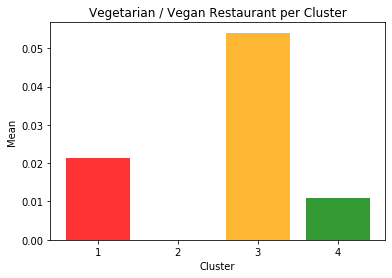

In [208]:
clusters_mean = [df_clus1["Vegetarian / Vegan Restaurant"].mean(),df_clus2["Vegetarian / Vegan Restaurant"].mean(),df_clus3["Vegetarian / Vegan Restaurant"].mean(),
                 df_clus4["Vegetarian / Vegan Restaurant"].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'black','orange', 'green'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Vegetarian / Vegan Restaurant per Cluster')

plt.show()